In [3]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("wine.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [6]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

In [7]:
df.Customer_Segment.unique()

array([1, 2, 3], dtype=int64)

In [8]:
df.shape

(178, 14)

In [9]:
df.size

2492

In [10]:
x = df.iloc[:,:13]
y = df.iloc[:,13]

In [11]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()

In [13]:
x_stand = sc.fit_transform(x)

<Axes: xlabel='Customer_Segment', ylabel='count'>

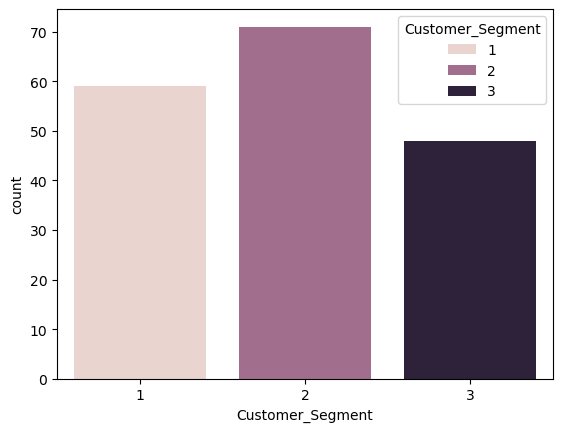

In [14]:
sns.countplot(x='Customer_Segment', data = df, hue ='Customer_Segment')


In [23]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA()
x_pca = pca.fit_transform(x_stand)

In [28]:
x_pca.shape

(178, 13)

In [29]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

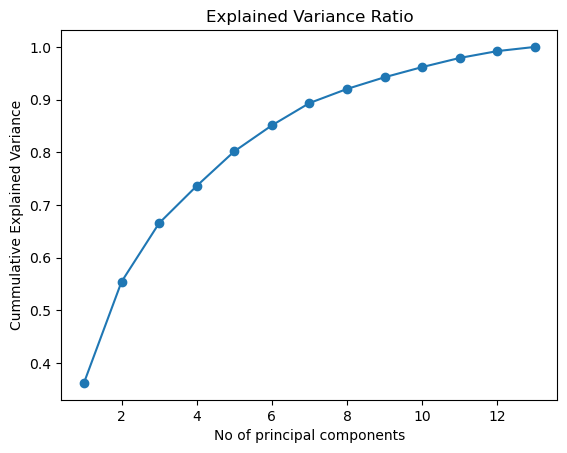

In [31]:
plt.plot(range(1,len(explained_variance_ratio)+1),explained_variance_ratio.cumsum(),marker='o',linestyle='-')
plt.xlabel("No of principal components")
plt.ylabel("Cummulative Explained Variance")
plt.title("Explained Variance Ratio")
plt.show()

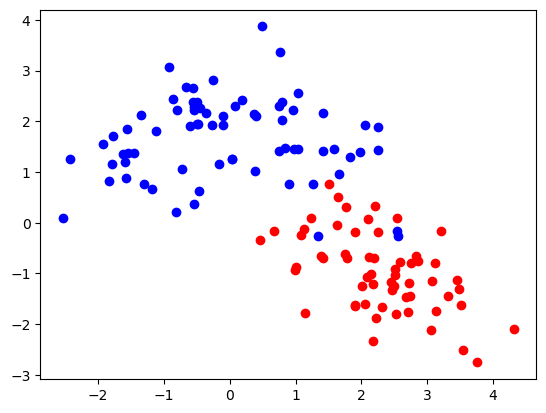

In [32]:
red_indices=y[y==1].index
white_indices=y[y==2].index

plt.scatter(x_pca[red_indices,0],x_pca[red_indices,1], c='red',label='red wine')
plt.scatter(x_pca[white_indices,0],x_pca[white_indices,1], c='blue',label='whitewine')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression()

In [23]:
lr.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
y_pred = lr.predict(x_test)

In [25]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9814814814814815

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.95      1.00      0.98        21
           3       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

